In [2]:
%matplotlib_svg
import numpy as np
import pylab as pl

## IPython Notebook入門

自從IPython 1.0發布以來，越來越多科學家、研究者、教師使用IPython Notebook處理資料、寫研究報告、甚至撰寫書籍。可以使用下面的nbviewer網站檢視在網路上公開的Notebook：

> **LINK**

> http://nbviewer.ipython.org/
>
> 透過這個網站可以快速檢視網路上任何Notebook的內容

在IPython的官方網站上收集了許多開發者發布的Notebook：

> **LINK**

> https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks

> 許多有趣的Notebook

本節簡要介紹IPython Notebook的基本使用方法、魔法指令以及顯示系統等方面的內容。

### 基本動作

#### 執行IPython Notebook

使用系統的指令行工具切換到儲存Notebook文件的目錄，並輸入`ipython notebook`指令即可啟動Notebook伺服器，並透過系統的預設瀏覽器開啟位址`http://127.0.0.1:8888`。建議讀者最好使用Firefox或Chrome瀏覽Notebook。

本書提供的程式碼目錄`scipybook2`中包括了一個啟動Notebook的批處理檔案`run_notebook.bat`。執行該批處理檔案之後，在瀏覽器的Notebook清單中依次點擊：`01-intro` → `intro-100-ipython.ipynb`就能開啟本節對應的Notebook文件。

如`ref:fig-next`所示，Notebook采用瀏覽器作為界面，首頁顯示目前路徑下的所有Notebook文件和資料夾。點擊“New Notebook”按鈕或文件名將開啟一個新的頁面，同時啟動一個運算核心執行緒與其互動。每個開啟的Notebook頁面都有單獨的Python執行緒與之對應，在Notebook中輸入的所有指令都將由瀏覽器傳遞到伺服器程式再轉信到該執行緒執行。文件的讀取和儲存工作由伺服器執行緒完成，而運算核心執行緒則負責執行使用者的程式。因此即使使用者程式造成運算核心執行緒例外離開也不會遺失任何使用者輸入的資料。在關閉伺服器執行緒之前，請確保所有的Notebook都已儲存。

![IPython Notebook架構示意圖](/files/images/ipython_notebook.png "")

Notebook有自動存檔和還原功能，可透過File → Revert to Checkpoint選單還原到以前的版本。此外為了確保安全，開啟他人建立的Notebook時，不會執行其中的Javascript程式和顯示SVG圖形。若果確信來源可靠，可以透過File → Trusted Notebook信任該Notebook。

#### 動作單元

> **SOURCE**

> `notebooks\01-intro\notebook-train.ipynb`：Notebook的動作教學，讀者可以使用它練習Notebook的基本動作。

Notebook由多個豎向排序的單元構成，每個單元可以有以下兩種型態：

* Code: Code單元中的文字將被作為程式碼執行，執行程式碼時按[Shift-Enter]，即同時按下[Shift]和[Enter]按鍵。

* Markdown: 使用Markdown的格式化文字，可以透過簡單的標示表示各種顯示格式。

單元的型態可以透過工具列中的下拉框或是快速鍵選取。為了快速動作這些單元格，需要掌握一些快速鍵，完整的快速鍵清單可以透過選單Help → Keyboard Shortcuts選單檢視。

Notebook的編輯有兩種模式：指令模式，單元編輯模式。在指令模式中，被勾選的單元格的邊框為灰色。該模式用來對整個單元格進行動作，例如移除、加入、修改格式等。按[Enter]鍵進入單元編輯模式，邊框的彩色變為綠色，並且上方選單條的右側會出現鉛筆圖示，表示目前處於編輯狀態。按[Esc]鍵可傳回指令模式。

#### 安裝MathJax

撰寫技術資料少不了輸入數學公式，Notebook使用MathJax將輸入的LaTeX文字轉換成數學公式。由於MathJax庫較大，沒有整合到IPython中，而是直接從MathJax官網載入，因此若果電腦沒有連線網路，就無法正確顯示數學公式了。為了解決這個問題，可以在單元中輸入如下程式，它將會下載MathJax到本機硬碟。

In [ ]:
from IPython.external.mathjax import install_mathjax, default_dest
install_mathjax()

MathJax完整解壓之後，約需100M空間，其中大都是為舊版本的瀏覽器準備的PNG字型圖形檔案。執行下面的敘述可以快速移除存放PNG字型圖片的資料夾：

In [ ]:
from os import path
import shutil

png_path = path.join(default_dest, "fonts/HTML-CSS/TeX/png")
shutil.rmtree(png_path)

執行完上面的指令之後，在指令模式下按[m]鍵將單元型態切換到Markdown。然後輸入如下LaTeX文字：

```$e^{i\pi} + 1 = 0$```

按[Shift-Enter]之後，其內容將轉換成數學公式顯示：$e^{i\pi} + 1 = 0$。

在本書提供的`scipybook2`下的`settings`目錄下已經安裝了MathJax，因此無需聯網也可以看到數學公式。

#### 動作運算執行緒

在程式碼單元中輸入的程式碼都將在運算核執行緒中的執行環境中執行。當執行某些程式碼出現問題時，可以透過Kernel選單中的選項動作該執行緒：

* Interrupt：中斷執行目前的程式，當程式進入無窮迴圈時可以透過它中斷程式執行。
* Restart：當運算核在延伸模組的程式中進入無窮迴圈，無法透過Interrupt選單中斷時，可以透過此選項重新啟動運算核執行緒。

一旦運算核執行緒被關閉，執行環境中的物件將不復存在，此時可以透過Cell → Run All選單再次執行所有的單元中的程式碼。程式碼將按照從上到下的順序執行。由於使用者在撰寫Notebook時，可以按照任意的順序執行單元，因此為了確保能再現執行環境中的所有物件，請記住調整單元的先後順序。

### 魔法(Magic)指令

IPython提供了許多魔法指令，使得在IPython環境中的動作更加得心應手。魔法指令都以`%`或是`%%`開頭，以`%`開頭的為行指令，`%%`開頭的為單元指令。行指令只對指令所在的行有效，而單元指令則必須出現在單元的第一行，對整個單元的程式碼進行處理。

執行`%magic`可以檢視關於各個指令的說明，而在指令之後加入`?`可以檢視該指令的詳細說明。此外延伸庫可以提供自己的魔法指令，這些指令可以透過`%load_ext`載入。例如`%load_ext cython`載入`%%cython`指令，以該指令開頭的單元將呼叫Cython編譯其中的程式碼。

#### 顯示matplotlib圖表

matplotlib是Python世界中最著名的繪圖延伸庫，它支援輸出多種格式的圖形圖形，並且可以使用多種GUI界面庫交談式地顯示圖表。使用`%matplotlib`指令可以將matplotlib的圖表直接內嵌到Notebook之中，或是使用特殊的界面庫顯示圖表，它有一個參數指定matplotlib圖表的顯示模式。

在下面的實例中，`inline`表示將圖表內嵌到Notebook中。因此最後一行`pl.plot()`所建立的圖表將直接顯示在該單元之下：

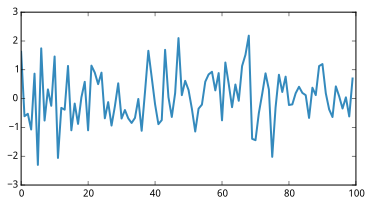

In [39]:
#%nofig
%matplotlib inline
import pylab as pl
pl.seed(1)
data = pl.randn(100)
pl.plot(data);

內嵌圖表的輸出格式預設為`PNG`，可以透過`%config`指令修改這個組態。`%config`指令可以組態IPython中的各個可組態物件，其中`InlineBackend`物件為matplotlib輸出內嵌圖表時所使用的組態，我們組態它的`figure_format="svg"`，這樣將內嵌圖表的輸出格式修改為`SVG`。

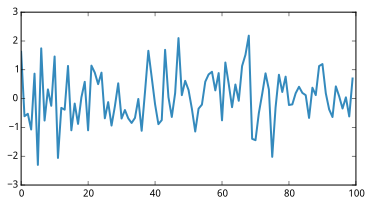

In [40]:
#%nofig
%config InlineBackend.figure_format="svg"
pl.plot(data);

內嵌圖表很適合製作圖文並茂的Notebook，然而它們是靜態的無法進行互動。可以將圖表輸出模式修改為使用GUI界面庫，下面的`qt4`表示使用QT4界面庫顯示圖表。請讀者根據自己系統的組態，選取合適的界面庫：`gtk, osx, qt, qt4, tk, wx`。

執行下面的敘述將出現一個視窗顯示圖表，可以透過滑鼠和鍵碟與此圖表互動。請注意該功能只能在執行IPython Kernel的機器上顯示圖表。

In [ ]:
%matplotlib qt4
pl.plot(data);

#### 效能分析

效能分析對撰寫處理大量資料的程式非常重要，特別是Python這樣的動態語系，一條敘述可能會執行很多內容，有的是動態的，有的呼叫延伸庫。不做效能分析，就無法對程式進行改善。IPython提供了許多效能分析的魔法指令。

`%timeit`呼叫`timeit`模組對單行敘述重復執行多次，計算出其執行時間。下面的程式碼測試修改清單單一元素所需的時間。

In [20]:
a = [1,2,3]
%timeit a[1] = 10

10000000 loops, best of 3: 69.3 ns per loop


`%%timeit`則用於測試整個單元中程式碼的執行時間。下面的程式碼測試空清單中循環加入10個元素所需的時間：

In [21]:
%%timeit
a = []
for i in xrange(10):
    a.append(i)

1000000 loops, best of 3: 1.82 μs per loop


`timeit`指令會重復執行程式碼多次，而`time`則只執行一次程式碼，輸出程式碼的執行情況，和`timeit`指令一樣，它可以作為行指令和單元指令。下面的程式碼統計往空清單中加入10萬個元素所需的時間。

In [22]:
%%time
a = []
for i in xrange(100000):
    a.append(i)

Wall time: 18 ms


`time`和`timeit`指令都將訊息使用`print`輸出，若果希望用程式分析這些訊息，可以使用`%%capture`指令，將單元格的輸出儲存為一個物件。下面的程式對不同長度的清單呼叫`random.shuffle()`打亂順序，用`%time`記錄下`shuffle()`的執行時間：

In [23]:
%%capture time_results
import random
for n in [1000, 5000, 10000, 50000, 100000, 500000]:
    print "n={0}".format(n)
    alist = range(n)
    %time random.shuffle(alist)

`time_results.stdout`屬性中儲存透過標准輸出管線中的輸出訊息：

In [24]:
print time_results.stdout

n=1000
Wall time: 1 ms
n=5000
Wall time: 5 ms
n=10000
Wall time: 10 ms
n=50000
Wall time: 40 ms
n=100000
Wall time: 62 ms
n=500000
Wall time: 400 ms



若果呼叫`%timeit`指令時加入`-o`參數，則它傳回一個表示執行時間訊息的物件。下面的程式對不同長度的清單呼叫`sorted()`排序，並使用`%timeit`指令統計排序所需的時間：

In [25]:
timeit_results = []
for n in [5000, 10000, 20000, 40000, 80000, 160000, 320000]:
    alist = [random.random() for i in xrange(n)]
    res = %timeit -o sorted(alist)
    timeit_results.append((n, res))

1000 loops, best of 3: 1.56 ms per loop
100 loops, best of 3: 3.32 ms per loop
100 loops, best of 3: 7.57 ms per loop
100 loops, best of 3: 16.4 ms per loop
10 loops, best of 3: 35.8 ms per loop
10 loops, best of 3: 81 ms per loop
10 loops, best of 3: 185 ms per loop


`ref:fig-next`顯示了排序的耗時結果。水平座標為對數座標軸，表示陣列的長度；垂直座標為平均每個元素所需的排序時間。可以看出每個元素所需的平均排序時間與陣列的長度的對數成正比，因此可以計算出排序函數`sorted()`的時間復雜度為：$O(n \log{n})$。

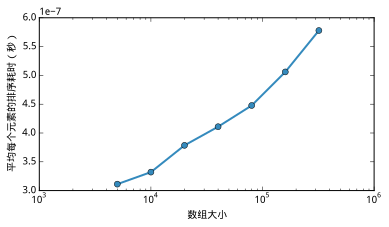

In [26]:
#%figonly=`sorted()`函數的時間復雜度
array_lengths = np.array([res[0] for res in timeit_results])
exec_times = np.array([res[1].best for res in timeit_results])
pl.semilogx(array_lengths, exec_times / array_lengths, "-o")
pl.xlabel(u"陣列大小")
pl.ylabel(u"平均每個元素的排序耗時（秒）");

`%%prun`指令呼叫`profile`模組，對單元中的程式碼進行效能剖析。下面的效能剖析顯示`fib()`執行了21891次，而`fib_fast()`則只執行了20次。

In [27]:
%%nopage
%%prun
def fib(n):
    if n < 2:
        return 1
    else:
        return fib(n-1) + fib(n-2)
    
def fib_fast(n, a=1, b=1):
    if n == 1:
        return b
    else:
        return fib_fast(n-1, b, a+b)

fib(20)
fib_fast(20)

         21913 function calls (4 primitive calls) in 0.007 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  21891/1    0.007    0.000    0.007    0.007 <string>:2(fib)
     20/1    0.000    0.000    0.000    0.000 <string>:8(fib_fast)
        1    0.000    0.000    0.007    0.007 <string>:2(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
 

#### 程式碼除錯

`%debug`指令用於除錯程式碼，它有兩種用法。一種是在執行程式碼之前設定斷點進行除錯，第二種則是在程式碼拋出例外之後，執行`%debug`指令檢視呼叫堆堆疊。下面先示範第二種用法：

In [28]:
import math

def sinc(x):
    return math.sin(x) / x

[sinc(x) for x in range(5)]

ZeroDivisionError: float division by zero

上面的程式拋出了`ZeroDivisionError`例外，下面用`%debug`檢視呼叫堆堆疊。在除錯模式下可以使用`pdb`模組提供的除錯指令，例如用`p x`顯示變數`x`的值。

In [29]:
%debug

> <ipython-input-28-9b69eaad97fe>(4)sinc()
      3 def sinc(x):
----> 4     return math.sin(x) / x
      5 

ipdb> p x
0
ipdb> q


還可以先設定斷點，然後執行程式。但是`%debug`的斷點需要指定檔名和行號，使用起來並不是太方便。本書提供了`%%func_debug`單元指令，可以透過它指定中斷執行的函數。在下面的實例中，程式將在`numpy.unique()`的第一行中斷執行，然後透過輸入`n`指令單步執行程式，最後輸入`c`繼續執行。

In [5]:
%%func_debug np.unique

np.unique([1, 2, 5, 4, 2])

Breakpoint 1 at c:\winpython-32bit-2.7.9.2\python-2.7.9\lib\site-packages\numpy\lib\arraysetops.py:96
NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> c:\winpython-32bit-2.7.9.2\python-2.7.9\lib\site-packages\numpy\lib\arraysetops.py(173)unique()
    172     """
--> 173     ar = np.asanyarray(ar).flatten()
    174 

ipdb> n
> c:\winpython-32bit-2.7.9.2\python-2.7.9\lib\site-packages\numpy\lib\arraysetops.py(175)unique()
    174 
--> 175     optional_indices = return_index or return_inverse
    176     optional_returns = optional_indices or return_counts

ipdb> c


#### 自訂的魔法指令 

> **SOURCE**

> `scpy2.utils.nbmagics`：該模組中定義了本書提供的魔法指令，若果讀者使用本書提供的批處理執行Notebook，則該模組已經載入。`notebooks\01-intro\scpy2-magics.ipynb`是這些魔法指令的使用說明。

IPython提供了很方便的自訂魔法指令的方法。最簡單的方法就是使用`register_line_magic`和`register_cell_magic`裝飾器將函數轉為魔法指令。下面的實例中使用`register_line_magic`定義了一個行魔法指令`%find`，它在特殊的物件中搜尋與目的比對的屬性名。

In [1]:
from IPython.core.magic import register_line_magic

@register_line_magic
def find(line):
    from IPython.core.getipython import get_ipython
    from fnmatch import fnmatch
    
    items = line.split() #❶
    patterns, target = items[:-1], items[-1]
    ipython = get_ipython() #❷
    names = dir(ipython.ev(target)) #❸
    
    results = []
    for pattern in patterns:
        for name in names:
            if fnmatch(name, pattern):
                results.append(name)
    return results

當呼叫`%find`行魔法指令時，魔法指令後面的所有內容都傳遞給`line`參數。❶按照空格對`line`分割，除最後一個元素之外，其余的元素都做為搜尋範本。而最後一個參數則為搜尋的目的。

❷透過`get_ipython()`函數獲得表示IPython運算核的物件，透過該物件可以動作運算核。❸呼叫運算核的`ev()`方法對表達式`target`求值得到實際的物件，並用`dir()`取得該物件的所有屬性名。

最後使用`fnmatch`模組對搜尋範本和屬性名進行比對，將比對結果儲存到`results`並傳回。下面使用`%find`指令在`numpy`模組中搜尋所有以`array`開頭，或是包括`mul`的屬性名：

In [2]:
import numpy as np
names = %find array* *mul* np
%col 4 names

['array',                'array2string',         'array_equal',          'array_equiv',         
 'array_repr',           'array_split',          'array_str',            'multiply',            
 'polymul',              'ravel_multi_index']   


下面的實例使用`register_cell_magic`登錄`%%cut`單元指令。在除錯程式碼時，我們經常會加入`print`敘述輸出中間結果。但若果輸出的字串太多，會導致瀏覽器的速度變慢甚至失去響應。此時可以使用`%%cut`限制程式輸出的行數和字元數。

`cut()`函數有兩個參數`line`和`cell`，其中`line`為單元第一行中除魔法指令之外的字串，而`cell`為除了單元中第一行之外的所有字串。`line`通常為魔法指令的參數，而`cell`則為需要執行的程式碼。IPython提供了基於裝飾器的參數分析函數。下面的實例中使用`argument()`宣告了兩個參數`-l`和`-c`分別指定最大行數和最大字元數。它們的預設值分別為100和10000。

In [8]:
from IPython.core.magic import register_cell_magic
from IPython.core.magic_arguments import argument, magic_arguments, parse_argstring

@magic_arguments()
@argument('-l', '--lines', help='max lines', type=int, default=100)
@argument('-c', '--chars', help='max chars', type=int, default=10000)
@register_cell_magic
def cut(line, cell):
    from IPython.core.getipython import get_ipython
    from sys import stdout
    args = parse_argstring(cut, line) #❶
    max_lines = args.lines
    max_chars = args.chars
    
    counters = dict(chars=0, lines=0)
    
    def write(string):
        counters["lines"] += string.count("\n")
        counters["chars"] += len(string)

        if counters["lines"] >= max_lines:
            raise IOError("Too many lines")
        elif counters["chars"] >= max_chars:
            raise IOError("Too many characters")
        else:
            old_write(string)
            
    try:
        old_write, stdout.write = stdout.write, write  #❷
        ipython = get_ipython()
        ipython.run_cell(cell) #❸
    finally:
        del stdout.write  #❹

❶呼叫`parse_argstring()`分析行參數，它的第一個參數是使用`argument`裝飾器修飾過的魔法指令函數，第二個參數為行指令字串。❷在呼叫單元程式碼之前，將`stdout.write()`置換為限制輸出行數和字元數的`write()`函數。❸然後呼叫運算核物件的`run_cell()`執行單元程式碼。❹執行完畢之後將`stdout.write()`移除，還原到原始狀態。

下面是使用`%%cut`限制輸出行數的實例：

In [9]:
%%cut -l 5
for i in range(10000):
    print "I am line", i

I am line 0
I am line 1
I am line 2
I am line 3
I am line 4

IOError: Too many lines

### Notebook的顯示系統

若單元中程式碼的最後一行沒有縮排，並且不以分號結尾，則在單元的輸出欄中顯示執行該程式碼所得到物件。此外運算核的標准輸出被重導至單元的輸出框中，因此可以使用`print`敘述輸出任何訊息。例如在下面的程式中，使用循環進行累加計算，在循環體中使用`print`輸出中間結果。而最後一行的運算結果就是變數`s`的值。

In [2]:
s = 0
for i in range(4):
    s += i
    print "i={}, s={}".format(i, s)
s

i=0, s=0
i=1, s=1
i=2, s=3
i=3, s=6


6

#### `display`模組

由於Notebook采用瀏覽器作為界面，因此除了可以顯示文字之外，還可以顯示圖形、動畫、HTML等多種形式的資料。有關顯示方面的功能均在`IPython.display`模組中定義。其中提供了如下的物件用於顯示各種格式的資料：

|    類別名       |                       說明                        |
|:------------:|:-------------------------------------------------|
|   `Audio`    | 將二進位資料、檔案或是網址顯示為播放音效的控制項           |
|   `FileLink` | 將檔案路徑顯示為一個超連結 |
|   `FileLinks` | 將資料夾路徑顯示為一群組超連結 |
|   `HTML`    | 將字串、檔案或是網址顯示為HTML |
|   `Image`   | 將表示圖形的二進位字串、檔案或是網址顯示為圖形 |
|   `Javascript` | 將字串作為Javascript程式碼在瀏覽器中執行 |
|   `Latex` | 將字串作為LaTeX程式碼顯示，主要用於顯示數學公式 |
|   `SVG`  | 將字串、檔案或網址顯示為SVG圖形 |

當對單元中程式的最後一行求值得到上述型態的物件時，將在單元的輸出欄中顯示為其對應的格式。或是可以使用`display`模組中的`display()`函數在程式中輸出這些物件。下面的程式使用`Latex`物件輸出了3個數學公式，其中前兩個使用`display()`輸出，而由於最後一行的求值結果為`Latex()`物件，它也會被顯示為數學公式。

In [3]:
from IPython import display

for i in range(2, 4):
    display.display(display.Latex("$x^{i} + y^{i}$".format(i=i)))
display.Latex("$x^4 + y^4$")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

`Image`物件可以用於顯示圖形，當用`url`參數時，它會從特殊的網址取得圖形，並顯示在Notebook中。若果`embed`參數為`True`，則圖形的資料將直接內嵌到Notebook之中，這樣此後開啟此Notebook時，即使沒有聯網也可以顯示該圖形。

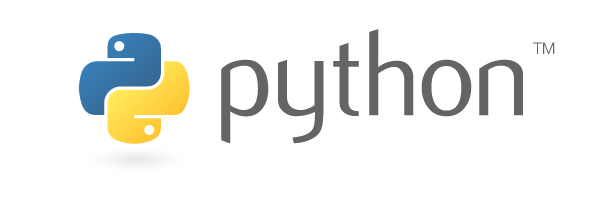

In [4]:
#%nofig
logourl = "https://www.python.org/static/community_logos/python-logo-master-v3-TM.png"
display.Image(url=logourl, embed=True)

在後續的章節中經常會將NumPy陣列顯示為圖形，這時可以使用matplotlib中提供的函數將陣列轉換成PNG圖形的字串，然後透過`Image`將圖形資料內嵌到Notebook中。下面的`as_png()`使用matplotlib中的`imsave()`將陣列轉換成PNG圖形資料。

In [5]:
def as_png(img, **kw):
    "將陣列轉換成PNG格式的字串資料"
    import io
    from matplotlib import image
    from IPython import display
    buf = io.BytesIO()
    image.imsave(buf, img, **kw)
    return buf.getvalue()

下面的程式透過公式$\sin(x^{2} + 2 \cdot y^{2} + x \cdot y)$產生二維陣列`z`，並呼叫`as_png()`將其轉為字串`png`，並檢視該字串的頭10個位元組，可以看出該字串就是PNG圖形檔案中的資料。最後使用`Image()`將該字串使用PNG圖形顯示。其結果如`ref:fig-next`（左）所示。

'\x89PNG\r\n\x1a\n\x00\x00'


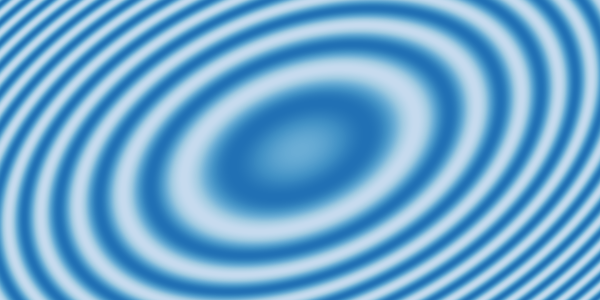

In [6]:
#%fig[1x2]=使用`as_png()`將陣列顯示為PNG圖形（左）、將`as_png()`登錄為陣列的顯示格式（右）
import numpy as np
y, x = np.mgrid[-3:3:300j, -6:6:600j]
z = np.sin(x**2 + 2*y**2 + x*y)
png = as_png(z, cmap="Blues", vmin=-2, vmax=2)
print repr(png[:10])
display.Image(png)

#### 自訂物件的顯示格式

有兩種模式可以自訂物件在Notebook中的顯示格式：

1. 給類別加入對應的顯示方法。
2. 為類別登錄對應的顯示函數。

當我們自己撰寫類別的程式碼時，使用第一種方法最為便捷。和Python的`__str__()`方法類別似，只需要定義`_repr_*_()`等方法即可，這裡的`*`可以是`html`、`svg`、`javascript`、`latex`、`png`等格式的名稱。

在下面的實例中，`Color`類別中定義了兩個`IPython`用的顯示方法：`_repr_html_()`和`_repr_png_()`，它們分別使用HTML和PNG圖形顯示彩色訊息。

In [7]:
class Color(object):
    
    def __init__(self, r, g, b):
        self.rgb = r, g, b
        
    def html_color(self):
        return '#{:02x}{:02x}{:02x}'.format(*self.rgb)
    
    def invert(self):
        r, g, b = self.rgb
        return Color(255-r, 255-g, 255-b)
    
    def _repr_html_(self):
        color = self.html_color()
        inv_color = self.invert().html_color()
        template = '<span style="background-color:{c};color:{ic};padding:5px;">{c}</span>'
        return template.format(c=color, ic=inv_color)
    
    def _repr_png_(self):
        img = np.empty((50, 50, 3), dtype=np.uint8)
        img[:,:,:] = self.rgb
        return as_png(img)

下面建立`Color`物件，並直接檢視它，IPython會自動選取最合適的顯示格式。由於Notebook是基於HTML的，HTML格式的優先等級最高，因此檢視`Color`物件時，`_repr_html_()`方法將被呼叫：

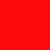

In [8]:
#%hide_output
c = Color(255, 10, 10)
c

為了使用其它格式顯示物件，可以呼叫`display.display_*()`函數，這裡呼叫`display_png()`將`Color`物件轉換成一個PNG圖形顯示：

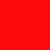

In [9]:
#%nofig
display.display_png(c)

每種輸出格式都對應一個`Formatter`物件，它們被儲存在`DisplayFormatter`物件的`formatters`字典中，下面是取得該字典中PNG格式所對應的`Formatter`物件：

In [10]:
shell = get_ipython()
png_formatter = shell.display_formatter.formatters[u'image/png']

呼叫`Formatter.for_type_by_name()`可以為該輸出格式加入特殊的格式顯示函數，其前兩個參數分別為模組名和類別名。由於使用字串指定類別，因此加入格式顯示函數時不需要載入目的類別。下面的程式碼為NumPy的陣列加入顯示函數`as_png()`。

In [11]:
png_formatter.for_type_by_name("numpy", "ndarray", as_png)

下面檢視前面建立的陣列`z`，它將以圖形的形式呈現，其結果如`ref:fig-next`（右）所示。

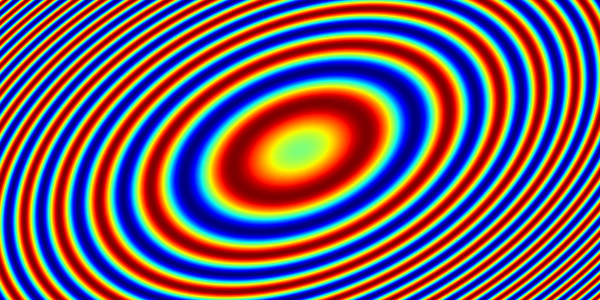

In [12]:
z

若果目的類別已經被載入時，可以使用`for_type()`方法為其加入格式顯示函數。下面的程式碼將表示分數的`Fraction`類別使用LaTeX的數學公式顯示：

In [13]:
from fractions import Fraction
latex_formatter = shell.display_formatter.formatters[u"text/latex"]
def fraction_formatter(obj):
    return '$$\\frac{%d}{%d}$$' % (obj.numerator, obj.denominator)
latex_formatter.for_type(Fraction, fraction_formatter)
Fraction(3, 4) ** 4 / 3

Fraction(27, 256)

### 定制IPython Notebook

雖然IPython只提供了最基本的編輯、執行Notebook的功能，但是它具有豐富的可定制性，使用者可以根據自己的需要打造出獨特的Notebook開發環境。如`ref:fig-prev3`所示，IPython Notebook系統由瀏覽器、伺服器和運算核三個部分群組成。IPython分別提供了這三個部分的定制方法。

#### 使用者組態（profile）

每次啟動IPython時都會從特殊的使用者組態（profile）資料夾下讀取組態訊息。下面的程式碼輸出目前的使用者組態檔夾的路徑：該路徑由`HOME`環境變數、`.ipython`和`profile_組態名`構成。

> **TIP**

> 在本書提供的執行IPython Notebook的批處理檔案中組態了`HOME`環境變數，因此能將組態檔夾和Notebook檔案一起打包。

In [22]:
import os
ipython = get_ipython()
print "HOME環境變數:", os.environ["HOME"]
print "IPython組態檔夾:", ipython.ipython_dir
print "目前的使用者組態檔夾:", ipython.config.ProfileDir.location

HOME環境變數: C:\Users\RY\Dropbox\scipybook2\settings
IPython組態檔夾: C:\Users\RY\Dropbox\scipybook2\settings\.ipython
目前的使用者組態檔夾: C:\Users\RY\Dropbox\scipybook2\settings\.ipython\profile_scipybook2


可以在指令行中輸入如下指令建立新的使用者組態：

    ipython profile create test


修改使用者組態檔夾之下的組態檔之後，在啟動Notebook時透過`--profile`參數指定所采用的使用者組態：

    ipython notebook --profile test

#### 伺服器延伸和Notebook延伸外掛

在`.ipython`資料夾之下還有兩個子資料夾`extensions`和`nbextensions`分別用於儲存伺服器和瀏覽器的延伸程式。

* `extensions`：存放用Python撰寫的伺服器延伸程式
* `nbextensions`：存放Notebook用戶端的延伸程式，通常為Javascript和CSS型態表檔案

Notebook的伺服器基於tornado伺服器框架開發，因此撰寫伺服器的延伸程式需要了解tornado框架，而開發Notebook用戶端（瀏覽器的界面部分）的延伸程式則需要了解HTML、Javascript和CSS型態表等方面的內容。這些內容與本書的主旨無關，就不再詳細敘述了。下面看看如何安裝他人開發的延伸程式。

> **LINK**

> https://github.com/ipython-contrib/IPython-notebook-extensions/wiki/config-extension

> 安裝IPython延伸程式的說明


首先執行下面的敘述安裝Notebook用戶端的延伸程式，`user`參數為`True`表示將延伸安裝在`HOME`環境變數路徑之下的`.ipython`資料夾之中。

In [23]:
%%disabled
import IPython.html.nbextensions as nb
ext= 'https://github.com/ipython-contrib/IPython-notebook-extensions/archive/3.x.zip'
nb.install_nbextension(ext, user=True)

上面的程式將在`nbextensions`資料夾下建立`IPython-notebook-extensions-3.x`資料夾，其中包括了許多用戶端延伸程式。接下來按照如下的步驟完成安裝：

* 將`nbextensions\IPython-notebook-extensions-3.x\config`搬移到`nbextensions`之下。
* 將`nbextensions\config\nbextensions.py`搬移到`extensions`資料夾之下。
* 在`.ipython`之下建立`templates`資料夾。
* 將`nbextensions\config\nbextensions.html`搬移到`templates`資料夾之下。
* 將`nbextensions\config\ipython_notebook_config.py`中的程式碼加入進`profile_default\ipython_notebook_config.py`。
* 存取`http://localhost:8888/nbextensions/`，在該頁面中可以管理`nbextensions`資料夾下安裝的用戶端延伸程式。

當Notebook伺服器啟動時，會執行使用者組態（profile）資料夾之下的`ipython_notebook_config.py`檔案，並使用其中的組態。

下面是`ipython_notebook_config.py`中的組態程式碼。❶首先將`extensions`資料夾加入進Python的模組搜尋路徑之下。因此該路徑之下的`nbextensions.py`檔案可以透過`import nbextensions`載入。❷指定伺服器延伸程式的模組名，由於之前加入了搜尋路徑，因此Python可以直接透過模組名`'nbextensions'`找到其對應的檔案`nbextensions.py`。❸將`templates`資料夾加入進伺服器延伸程式的網頁範本的搜尋路徑，讓伺服器可以找到`nbextensions.html`檔案。

In [25]:
%%disabled
from IPython.utils.path import get_ipython_dir
import os
import sys

ipythondir = get_ipython_dir()
extensions = os.path.join(ipythondir,'extensions') 
sys.path.append( extensions ) #❶

c = get_config()
c.NotebookApp.server_extensions = [ 'nbextensions'] #❷
c.NotebookApp.extra_template_paths = [os.path.join(ipythondir,'templates')] #❸

`nbextensions`延伸程式為伺服器加入了一個新的URL：`http://localhost:8888/nbextensions/`，透過該路徑可以開啟或禁止特殊的用戶端延伸程式。`nbextensions`延伸程式透過遞歸搜尋`nbextensions`資料夾下的YAML檔案識別用戶端延伸程式，`IPython-notebook-extensions-3.x`目錄下只有部分延伸程式附帶了YAML檔案，讀者可以仿照這些檔案為其它的延伸程式加入對應的YAML檔案，這樣就可以透過`nbextensions`頁面管理延伸程式了。

#### 加入新的運算核

由於執行使用者程式碼的運算核與Notebook伺服器是獨立的執行緒，因此不同的Notebook可以使用不同版本的Python甚至是其它語系的運算核。IPython的下一個版本將改名為Jupyter，其目的是建立一個通用的科學計算的開發環境，支援Julia、Python和R等在資料處理領域流行的語系。下面以Python3-64bit為例介紹如何加入新的運算核。

首先從WinPython的網址下載`WinPython-64bit-3.4.3.3.exe`，並安裝在C碟根目錄之下。然後執行下面的程式碼建立運算核組態檔：

In [37]:
import os
from os import path
import json

ipython = get_ipython()
kernels_folder = path.join(ipython.ipython_dir, "kernels")
if not path.exists(kernels_folder):
    os.mkdir(kernels_folder)
    
python3_path = "C:\\WinPython-64bit-3.4.3.3\\scripts\\python.bat"

kernel_settings = {
 "argv": [python3_path, 
          "-m", "IPython.kernel", "-f", "{connection_file}"],
 "display_name": "Python3-64bit",
 "language": "python"
}

kernel_folder = path.join(kernels_folder, kernel_settings["display_name"])
if not path.exists(kernel_folder):
    os.mkdir(kernel_folder)
    
kernel_fn = path.join(kernel_folder, "kernel.json")

with open(kernel_fn, "w") as f:
    json.dump(kernel_settings, f, indent=4)

上面的程式碼建立`.ipython\kernels\python3-64bit\kernel.json`檔案，它是一個JSON格式的字典，其中`"argv"`鍵為運算核的啟動指令，`"display_name"`為運算核的顯示名稱，`"language"`為運算核的語系。

更新Notebook的索引頁面之後，可以在“New”下拉選單中找到“Python3-64bit”的選項，點其它將開啟一個以Python3 64bit解釋器為運算核的Notebook頁面。在Notebook頁面中也可以使用“Kernel”選單變更目前的運算核。運算核的組態儲存在Notebook檔案之中，因此下一次開啟該Notebook時，將自動使用最後一次選取的運算核。

感興趣的讀者可以試試加入更多的運算核，筆者在Windows系統下成功地安裝了PyPy、Julia、R、NodeJS等運算核。